In [7]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.read_csv('DxComboCounts.txt',sep='|')
data.head()

,DXCD1,DXCD2,DX1DENOM,DX2DENOM,PTDENOM,COMBOCOUNT
0,272.4,401.9,26891,55386,269332,19702
1,250.00,401.9,23825,55386,269332,16376
2,272.0,401.9,16919,55386,269332,10715
3,401.9,530.81,55386,22002,269332,10696
4,250.00,272.4,23825,26891,269332,10224


In [4]:
data['B'] = data['DX1DENOM'] - data['COMBOCOUNT']
data['C'] = data['DX2DENOM'] - data['COMBOCOUNT']
data['A'] = data['PTDENOM'] - data['COMBOCOUNT'] - data['B'] - data['C']
data.head()

,DXCD1,DXCD2,DX1DENOM,DX2DENOM,PTDENOM,COMBOCOUNT,B,C,A
0,272.4,401.9,26891,55386,269332,19702,7189,35684,206757
1,250.00,401.9,23825,55386,269332,16376,7449,39010,206497
2,272.0,401.9,16919,55386,269332,10715,6204,44671,207742
3,401.9,530.81,55386,22002,269332,10696,44690,11306,202640
4,250.00,272.4,23825,26891,269332,10224,13601,16667,228840


In [10]:
#The first row of our array is hyperlipidemia vs hypertension
#Unsurprisingly, they have a super-significant p
obs = np.array([ [206757, 7189], [35684, 19702]])
chi2,p,dof,exp = stats.chi2_contingency( obs )
print('Chi-square:{}   p:{}'.format(chi2, p))

Chi-square:50790.57215576525   p:0.0


In [13]:
data['p'] = data.apply(lambda row: stats.chi2_contingency( np.array( [[row['A'],row['B']],[row['C'],row['COMBOCOUNT']]]) )[1], axis=1)

In [15]:
data['chi2'] = data.apply(lambda row: stats.chi2_contingency( np.array( [[row['A'],row['B']],[row['C'],row['COMBOCOUNT']]]) )[0], axis=1)

In [16]:
data.head()


,DXCD1,DXCD2,DX1DENOM,DX2DENOM,PTDENOM,COMBOCOUNT,B,C,A,p,chi2
0,272.4,401.9,26891,55386,269332,19702,7189,35684,206757,0.0,50790.572156
1,250.00,401.9,23825,55386,269332,16376,7449,39010,206497,0.0,37123.575561
2,272.0,401.9,16919,55386,269332,10715,6204,44671,207742,0.0,20210.604934
3,401.9,530.81,55386,22002,269332,10696,44690,11306,202640,0.0,11537.893676
4,250.00,272.4,23825,26891,269332,10224,13601,16667,228840,0.0,31529.014262


In [17]:
data.to_csv('ICD_Combo_Chi2.txt',sep='\t')

In [18]:
import matplotlib.pyplot as plt


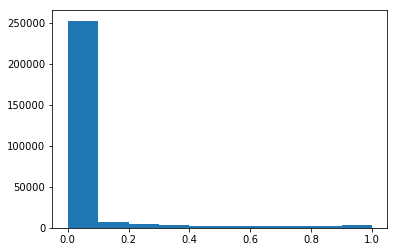

In [19]:
plt.hist( data['p'])
plt.show()

In [20]:
len(data)

280155

In [21]:
data['expected'] = data.apply(lambda row: stats.chi2_contingency( np.array( [[row['A'],row['B']],[row['C'],row['COMBOCOUNT']]]) )[3][1][1], axis=1)

In [22]:
data.head()

,DXCD1,DXCD2,DX1DENOM,DX2DENOM,PTDENOM,COMBOCOUNT,B,C,A,p,chi2,expected
0,272.4,401.9,26891,55386,269332,19702,7189,35684,206757,0.0,50790.572156,5529.921903
1,250.00,401.9,23825,55386,269332,16376,7449,39010,206497,0.0,37123.575561,4899.423203
2,272.0,401.9,16919,55386,269332,10715,6204,44671,207742,0.0,20210.604934,3479.258811
3,401.9,530.81,55386,22002,269332,10696,44690,11306,202640,0.0,11537.893676,4524.537641
4,250.00,272.4,23825,26891,269332,10224,13601,16667,228840,0.0,31529.014262,2378.767005


In [23]:
data = data[ data.expected > data.COMBOCOUNT ]

In [24]:
data.head()

,DXCD1,DXCD2,DX1DENOM,DX2DENOM,PTDENOM,COMBOCOUNT,B,C,A,p,chi2,expected
229,401.9,780.60,55386,9926,269332,1905,53481,8021,205925,5.948546e-04,11.792011,2041.203555
951,401.9,465.9,55386,5668,269332,927,54459,4741,209205,2.617564e-15,62.534962,1165.579463
980,401.9,787.03,55386,4959,269332,910,54476,4049,209897,1.064682e-04,15.018397,1019.779209
1030,272.4,780.60,26891,9926,269332,884,26007,9042,233399,2.781978e-04,13.211761,991.044755
1176,250.00,780.60,23825,9926,269332,823,23002,9103,236404,4.944660e-02,3.860127,878.049953


In [26]:
data.sort_values(by='p', inplace=True)
data.head()

,DXCD1,DXCD2,DX1DENOM,DX2DENOM,PTDENOM,COMBOCOUNT,B,C,A,p,chi2,expected
18077,401.9,648.91,55386,2904,269332,137,55249,2767,211179,6.201933e-100,450.301380,597.184679
1190,401.9,462,55386,7019,269332,815,54571,6204,207742,9.137499e-79,353.059826,1443.401950
80477,401.9,649.63,55386,1677,269332,39,55347,1638,212308,1.807008e-76,342.515891,344.861814
183578,401.9,664.01,55386,1433,269332,17,55369,1416,212530,9.728001e-74,329.975959,294.685140
144803,401.9,664.11,55386,1377,269332,22,55364,1355,212591,5.335159e-68,303.629012,283.169182
